# Forest Cover Prediction - Kaggle

## Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data = data.drop('Id', 1)

## Statistical description

In [3]:
#######  Gives Number of missing values in each feature
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


* No Missing Data

In [4]:
####### Describe dataset
pd.set_option('display.max_columns', None)
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

* ##### Removing unwanted fearures

In [5]:
useless = []
### if data is constant then remove it
for i in data.columns:
    if data[i].std() == 0:
        useless.append(i)
print(useless)
data.drop(useless, 1, inplace = True)

['Soil_Type7', 'Soil_Type15']


## Skewness

In [6]:
###### Gives amount of Skewness in the data
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type8          

* Soil_Type8 , Soil_Type25 are highly skew

In [7]:
#####  Shows number of datapoints in each class
data.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

* All classes are equally present

## Correlation Analysis

#### Heat Map of Non-Categorical Data

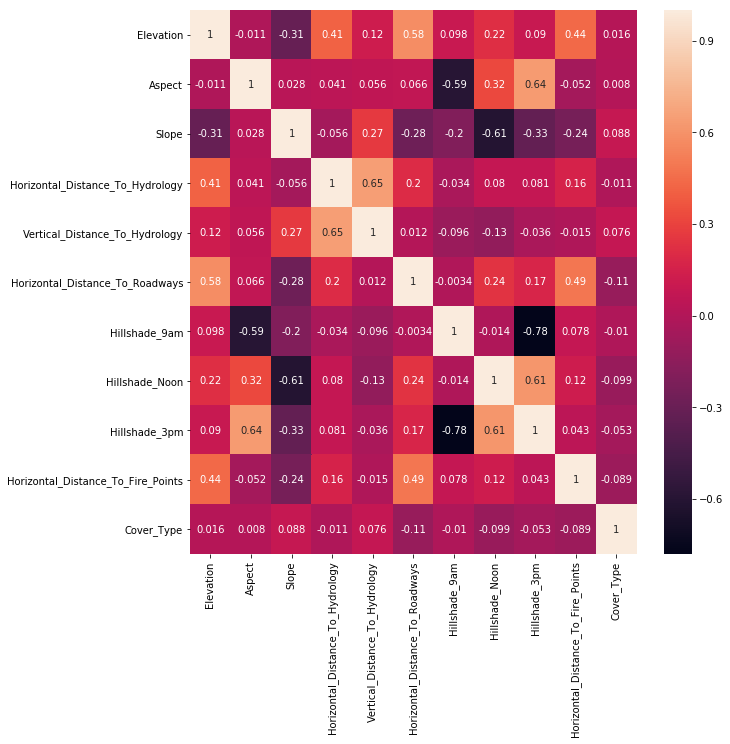

In [8]:
plt.subplots(figsize=(10,10))
sns.heatmap(data[['Elevation','Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type']].corr(), annot=True)

#### Highly Correlated features

In [9]:
limit = 0.5
corr = data.corr()
corr_list = []
for i in range(10):
    for j in range(i+1, 10):
        if 1 > corr.iloc[i,j] >= limit or 0 > corr.iloc[i,j] <= -limit:
            corr_list.append([corr.iloc[i,j], i, j])

#### PairPlot of Highly Correlated features

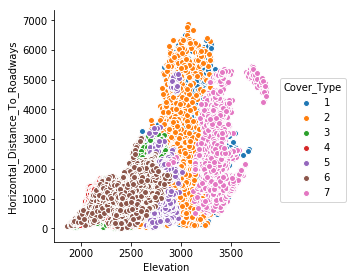

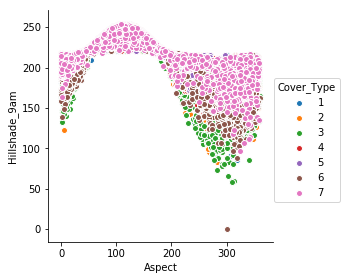

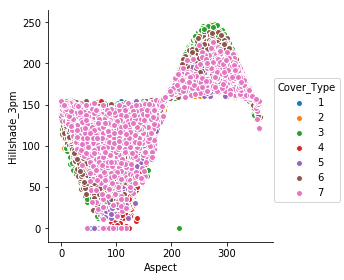

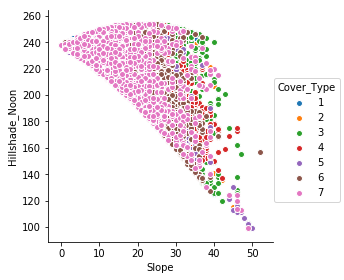

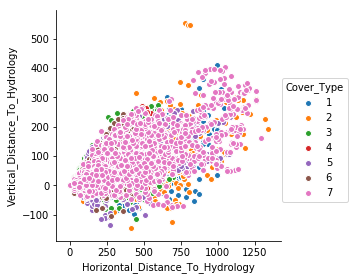

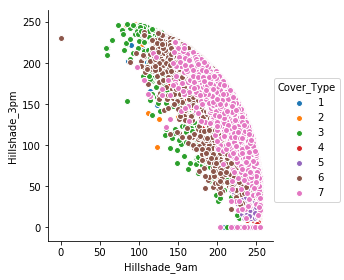

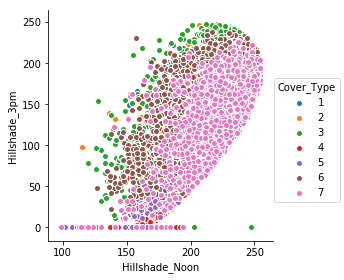

In [10]:
for x, y, z in corr_list:
    sns.pairplot(data, hue = "Cover_Type", size = 4, x_vars = data.columns[y], y_vars = data.columns[z])

## Preparing Data

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
#### divide data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train[:,:10] = sc_x.fit_transform(x_train[:,:10])
x_test[:,:10] = sc_x.transform(x_test[:,:10])

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Models

> ### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train, y_train)
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

0.478363567649
0.476631393298


In [15]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB(alpha = 0.8)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.617252456538
0.616622574956


* BernoulliNB gave good results compared to GaussianNB

> ### Decision Tree

In [16]:
from sklearn import tree
model3 = tree.DecisionTreeClassifier(min_samples_split = 2,random_state = 42, max_depth = 50, max_leaf_nodes = 900)
model3.fit(x_train, y_train)
print(model3.score(x_train, y_train))
print(model3.score(x_test, y_test))

0.825302343159
0.744929453263


> ### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators= 100, min_samples_split=2, n_jobs = 4, max_leaf_nodes = 850, random_state = 42)
model4.fit(x_train, y_train)
print(model4.score(x_train, y_train))
print(model4.score(x_test, y_test))

0.834845049131
0.764329805996


> ### AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators = 6, learning_rate = 1, random_state = 42)
model5.fit(x_train, y_train)
print(model5.score(x_train, y_train))
print(model5.score(x_test, y_test))

0.436885865457
0.449514991182


> ### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100, max_depth = 4, random_state = 42)
model6.fit(x_train, y_train)
print(model6.score(x_train, y_train))
print(model6.score(x_test, y_test))

0.83522297808
0.75815696649


* RandomForest gave good results compared to all other classifiers.

## Submission in Kaggle

In [20]:
data1 = pd.read_csv('test.csv')
data1 = data1.drop('Id', 1)
data1.drop(useless, 1, inplace = True)

tx = data1.iloc[:,:].values
tx[:,:10] = sc_x.transform(tx[:,:10])

ty = model4.predict(tx)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
sub = pd.read_csv('test.csv').Id
sub = pd.DataFrame(sub)
sub['Cover_Type'] = ty

sub.to_csv('sub2.csv', index = False)